## Compare percentile changes for o2 and o2sat in ESM4

In [1]:
import xarray as xr
import cftime
from xhistogram.xarray import histogram
import numpy as np
from dask.diagnostics import ProgressBar
import matplotlib.pyplot as plt

from tracerpercentile import *

In [13]:
config_id = 'ESM4_historical_D1'
ds_datadir = '/work/gam/projects/oxygen/data/'
ds_filename = 'ds.'+config_id+'.zarr'
ds = xr.open_zarr(ds_datadir+ds_filename)

ascending=True
volume = ds['volcello']
tracer_bins = np.linspace(0,0.4,400)
percentiles = np.linspace(1,100,100)

In [14]:
# o2
print('o2')
tracer = ds['o2']
o2p,VT = calc_tracerpercentile(tracer = tracer,
                              volume = volume,
                              tracer_bins=tracer_bins,
                              percentiles=percentiles,
                              ascending=ascending,
                              verbose=True)
O2p = calc_extensive(o2p,VT.mean('time'))

# o2sat
print('o2sat')
tracer = ds['o2sat']
o2satp,VT = calc_tracerpercentile(tracer = tracer,
                              volume = volume,
                              tracer_bins=tracer_bins,
                              percentiles=percentiles,
                              ascending=ascending,
                              verbose=True)
O2satp = calc_extensive(o2satp,VT.mean('time'))

o2
Computing volumetric histogram.
[########################################] | 100% Completed |  4.8s
Inverting for tracer percentile at each time.
time index : 0/165
time index : 10/165
time index : 20/165
time index : 30/165
time index : 40/165
time index : 50/165
time index : 60/165
time index : 70/165
time index : 80/165
time index : 90/165
time index : 100/165
time index : 110/165
time index : 120/165
time index : 130/165
time index : 140/165
time index : 150/165
time index : 160/165
o2sat
Computing volumetric histogram.
[########################################] | 100% Completed |  4.5s
Inverting for tracer percentile at each time.
time index : 0/165
time index : 10/165
time index : 20/165
time index : 30/165
time index : 40/165
time index : 50/165
time index : 60/165
time index : 70/165
time index : 80/165
time index : 90/165
time index : 100/165
time index : 110/165
time index : 120/165
time index : 130/165
time index : 140/165
time index : 150/165
time index : 160/165


In [15]:
with ProgressBar():
    O2p.load()
    O2satp.load()

[########################################] | 100% Completed |  3.7s
[########################################] | 100% Completed |  3.6s


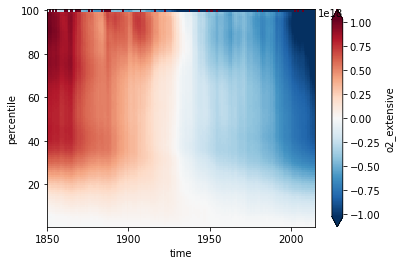

In [16]:
(O2p-O2p.mean('time')).plot(robust=True)

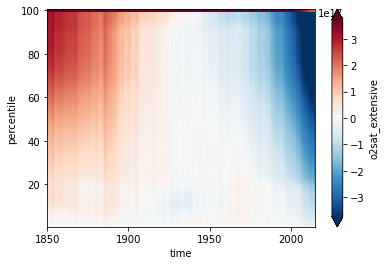

In [17]:
(O2satp-O2satp.mean('time')).plot(robust=True)

In [18]:
t1 = ['1980','1989']
t2 = ['2000','2009']
t1slice = slice(t1[0]+'-01-01',t1[1]+'-12-31')
t2slice = slice(t2[0]+'-01-01',t2[1]+'-12-31')
t1label = t1[0]+' to '+t1[1]
t2label = t2[0]+' to '+t2[1]
t1color='tab:blue'
t2color='tab:orange'
dt = cftime.datetime(int(t2[1]),12,31)-cftime.datetime(int(t1[1]),12,31)
dt = dt.days*24*60*60

In [19]:
O2p_t1 = O2p.sel(time=t1slice).mean('time')
O2p_t2 = O2p.sel(time=t2slice).mean('time')
O2satp_t1 = O2satp.sel(time=t1slice).mean('time')
O2satp_t2 = O2satp.sel(time=t2slice).mean('time')

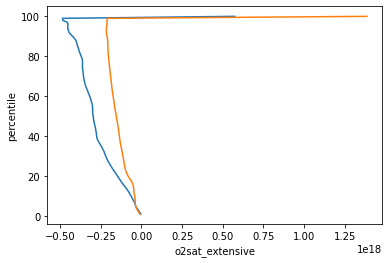

In [20]:
(O2p_t2-O2p_t1).plot(y='percentile')
(O2satp_t2-O2satp_t1).plot(y='percentile')